In [1]:
#!pip install --upgrade pip
!pip install matplotlib

### Downloading a File from an S3 Bucket to Notebook instance

In [2]:
import boto3
import botocore

BUCKET_NAME = '<PUT_HERE_THE_BUCKET_NAME>'
KEY = 'DataAnalysisAndVisualizationLab - 2019/car_data.csv'

s3 = boto3.resource('s3')

try:
    s3.Bucket(BUCKET_NAME).download_file(KEY, 'car_data.csv')
except botocore.exceptions.ClientError as e:
    if e.response['Error']['Code'] == "404":
        print("The object does not exist.")
    else:
        raise

### Load Data from CSV Files to DataFrame using Pandas

In [3]:
import pandas as pd 

data = pd.read_csv("car_data.csv")
data.head()

,car,year,engine_hp,avg_mpg,price,salesman,dealership,sold_date,sold_month
0,Corvette,2011,335.0,22.5,46135,2,Big Bobs,2012-05-06,5
1,Corvette,2011,300.0,23.5,40650,2,Uptown Cars,2011-05-16,5
2,Corvette,2011,300.0,24.0,36350,2,Uptown Cars,2013-07-31,7
3,Corvette,2011,230.0,23.0,29450,2,Uptown Cars,2014-07-05,7
4,Corvette,2011,230.0,23.0,34500,2,Uptown Cars,2013-05-20,5


### Which month generates the most sales?

In [4]:
import matplotlib.pyplot as plt

s1 = data.groupby('sold_month').size()
s1.plot.bar()
plt.show()

<Figure size 640x480 with 1 Axes>

### Which car salesman sold the most cars?

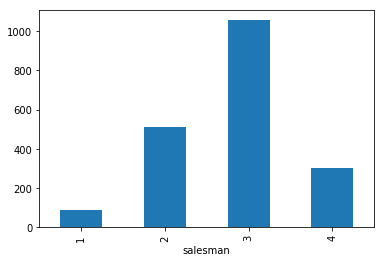

In [5]:
import matplotlib.pyplot as plt

s2 = data.groupby('salesman').size()
s2.plot.bar()
plt.show()

### Which dealership sold the most cars?

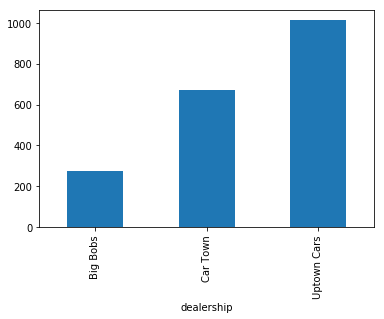

In [6]:
import matplotlib.pyplot as plt

s2 = data.groupby('dealership').size()
s2.plot.bar()
plt.show()

### In what year was the average price of a Corvette greater than 100K?

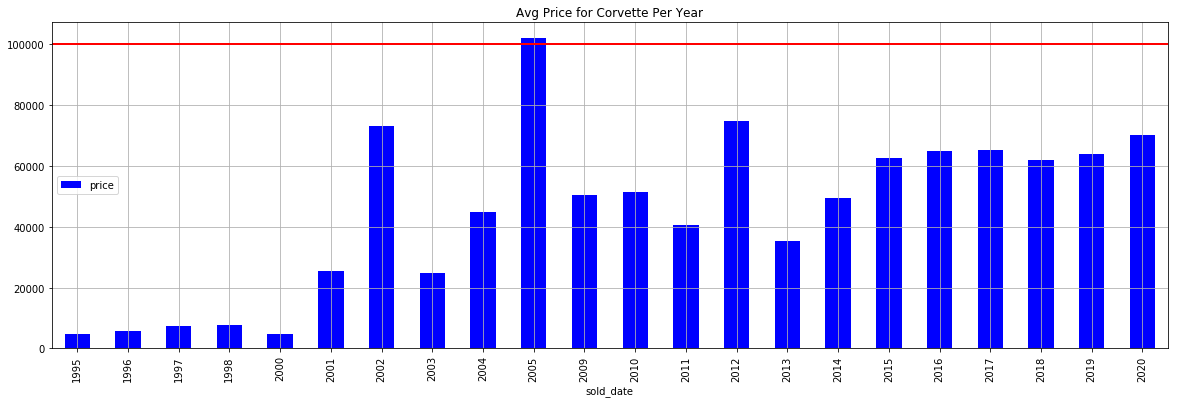

In [8]:
#del DataFrame is existed
#del data_corvette

#deep copy to new DataFrame
data_corvette=data.copy(deep=True)

#remove all cars that are not Corvette'
data_corvette=data_corvette[data_corvette['car']=='Corvette']
data_corvette

#drops irelevant columns 
columns = ['car','year', 'engine_hp','avg_mpg','salesman','dealership','sold_month']
data_corvette.drop(columns, inplace=True, axis=1)

#take only the year of the 'sold_date'
data_corvette['sold_date'] = data_corvette['sold_date'].str.slice(0, 4)

# aggregate avg car's price group by sold_date's year
data_corvette=data_corvette.groupby('sold_date').mean()

# draw bar chart
fig, ax = plt.subplots(figsize=(20,6))
data_corvette.plot(kind='bar',color='blue',ax=ax)
ax.grid(True)
ax.set_title('Avg Price for Corvette Per Year')
plt.axhline(y=100000, xmin=0, xmax=2030, linewidth=2, color = 'r')
plt.show() 

### Which car has several points in the box plot’s far-right upper quartile for the engine's horsepower?

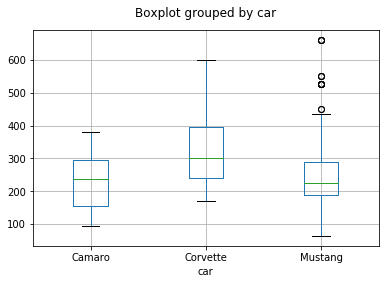

In [9]:
bp = data.boxplot(column=['engine_hp'],by='car')
plt.title("")#remove automatic title
plt.show()